In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import h5py
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import FD as FD_file
simname = 'BianchiII'

In [2]:
def convergence_order_3d(E1, E2):
    E2 = E2[0::2,0::2,0::2]
    c = abs(E1)/abs(E2)
    print('Convergence order: ', np.mean(np.ma.masked_invalid(np.log(c)/np.log(2))))
def convergence_order_4d(E1, E2):
    E2 = E2[2::2,0::2,0::2,0::2]
    E2 = E2[:len(E1)-len(E2)]
    c = abs(E1)/abs(E2)
    print('Convergence order: ', np.mean(np.ma.masked_invalid(np.log(c)/np.log(2))))

In [3]:
L = 20
N = 32
dx = L/N
FD = FD_file.FD_Class(dx, periodic_boundary=False, order6=True)
xyz = np.arange(-L/2, L/2, dx)
x, y, z = np.meshgrid(xyz, xyz, xyz, indexing='ij')
Box_zero = np.zeros([N, N, N])
Box_ones = np.ones([N, N, N])

In [4]:
gamma = 4/3  #dust: 1, radiation: 4/3
p1 = (2-gamma)/(2*gamma)
p2 = (2+gamma)/(4*gamma)
s = np.sqrt((2 - gamma)*(3*gamma-2))

# 3+1 formulation

In [5]:
t = 1.5
gdown = np.array([[(t**(2*p1))*Box_ones,      (t**(2*p1))*s*z/(2*gamma),                    Box_zero],
                  [(t**(2*p1))*s*z/(2*gamma), (t**(2*p2))+(t**(2*p1))*((s*z/(2*gamma))**2), Box_zero],
                  [Box_zero,                  Box_zero,                                     (t**(2*p2))*Box_ones]])

Kdown = (-1/2)*np.array([[2*p1*(t**(2*p1-1))*Box_ones,      2*p1*(t**(2*p1-1))*s*z/(2*gamma),                           Box_zero],
                         [2*p1*(t**(2*p1-1))*s*z/(2*gamma), 2*p2*(t**(2*p2-1))+2*p1*(t**(2*p1-1))*((s*z/(2*gamma))**2), Box_zero],
                         [Box_zero,                         Box_zero,                                                   2*p2*(t**(2*p2-1))*Box_ones]])

In [6]:
glist = [gdown[0,0], gdown[0,1], gdown[0,2], gdown[1,1], gdown[1,2], gdown[2,2]]
gdet = RRead.det(glist)
gup = RRead.inv(glist, gdet)
gmixed = np.einsum('ij...,jk...->ik...', gup, gdown)

RCW = RCW_file.Ricci_CoGrad_Weyl_Class(dx, periodic_boundary=False)
Gudd = RCW.Christoffel_symbol(gdown, gup)
RicciTdown, RicciS3 = RCW.Ricci_TandS(gup, Gudd)

In [7]:
G        = 1
kappa    = 8*np.pi*G
rho      = (6-gamma)/(kappa*4*t*t*gamma*gamma)
pressure = (gamma-1)*rho
uup = np.array([Box_ones, Box_zero, Box_zero, Box_zero])
gdown4 = np.array([[-Box_ones, Box_zero,   Box_zero,   Box_zero],
                   [Box_zero,  gdown[0,0], gdown[0,1], gdown[0,2]],
                   [Box_zero,  gdown[1,0], gdown[1,1], gdown[1,2]],
                   [Box_zero,  gdown[2,0], gdown[2,1], gdown[2,2]]])
udown = np.einsum('ab...,b...->a...', gdown4, uup)
Tdown4 = (rho+pressure)*np.einsum('a...,b...->ab...',udown,udown)+pressure*gdown4
LCdown = np.zeros([3,3,3, N, N, N])
LCdown[0, 1, 2, :, :, :] = np.sqrt(abs(gdet))
LCdown[1, 2, 0, :, :, :] = np.sqrt(abs(gdet))
LCdown[2, 0, 1, :, :, :] = np.sqrt(abs(gdet))
LCdown[2, 1, 0, :, :, :] = -np.sqrt(abs(gdet))
LCdown[0, 2, 1, :, :, :] = -np.sqrt(abs(gdet))
LCdown[1, 0, 2, :, :, :] = -np.sqrt(abs(gdet))
gdetth = (t**(2*p1 + 4*p2))*Box_ones

# Check Christoffel

In [19]:
print(np.sum(abs(Gudd[0,0,0])))
print(np.sum(abs(Gudd[0,0,1])))
#print(np.sum(abs(Gudd[0,0,2])))
print(np.sum(abs(Gudd[0,1,1])))
#print(np.sum(abs(Gudd[0,1,2])))
print(np.sum(abs(Gudd[0,2,2])))
print(np.sum(abs(Gudd[1,0,0])))
print(np.sum(abs(Gudd[1,0,1])))
#print(np.sum(abs(Gudd[1,0,2])))
print(np.sum(abs(Gudd[1,1,1])))
#print(np.sum(abs(Gudd[1,1,2])))
print(np.sum(abs(Gudd[1,2,2])))
print(np.sum(abs(Gudd[2,0,0])))
#print(np.sum(abs(Gudd[2,0,1])))
print(np.sum(abs(Gudd[2,0,2])))
#print(np.sum(abs(Gudd[2,1,1])))
print(np.sum(abs(Gudd[2,1,2])))
print(np.sum(abs(Gudd[2,2,2])))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


<IPython.core.display.Javascript object>


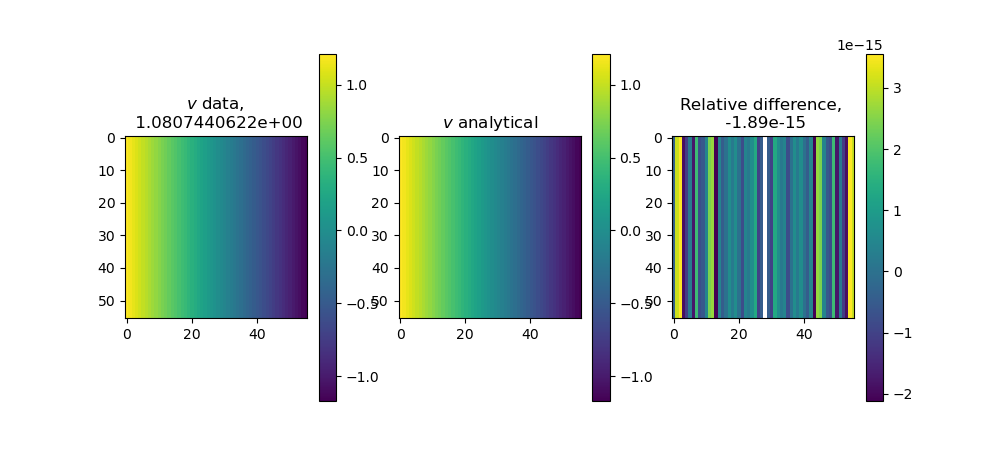

<ipython-input-29-aaaa8be5493e>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(v[i,4:-4,4:-4]/vth[i,4:-4,4:-4]-1)


Text(0.5, 1.0, 'Relative difference, \n -1.89e-15')

In [29]:
v = Gudd[0,0,2]
vth = -s*s*(t**(2*(p1-p2)))*z/(8*gamma*gamma) #1e-15

v = Gudd[0,1,2]
vth = (4*gamma*gamma*s-s*s*s*(t**(2*(p1-p2)))*z*z)/(16*gamma*gamma*gamma) #1e-14

v = Gudd[1,0,2]
vth = Box_ones*s*(t**(2*(p1-p2)))/(4*gamma) #1e-15

v = Gudd[1,1,2]
vth = s*s*(t**(2*(p1-p2)))*z/(8*gamma*gamma) #1e-15

v = Gudd[2,0,1]
vth = -Box_ones*s*(t**(2*(p1-p2)))/(4*gamma) #1e-15

v = Gudd[2,1,1]
vth = -s*s*(t**(2*(p1-p2)))*z/(4*gamma*gamma) #1e-15

i = 7
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(v[i,4:-4,4:-4])
plt.colorbar()
plt.title(r'$v$ data, '+'\n {:.10e}'.format(np.mean(v[4:-4,4:-4,i])))
plt.subplot(132)
plt.imshow(vth[i,4:-4,4:-4])
plt.colorbar()
plt.title(r'$v$ analytical')
plt.subplot(133)
plt.imshow(v[i,4:-4,4:-4]/vth[i,4:-4,4:-4]-1)
plt.colorbar()
plt.title('Relative difference, '+'\n {:.2e}'.format(np.mean(v[4:-4,4:-4,i]/vth[4:-4,4:-4,i]-1)))

<IPython.core.display.Javascript object>


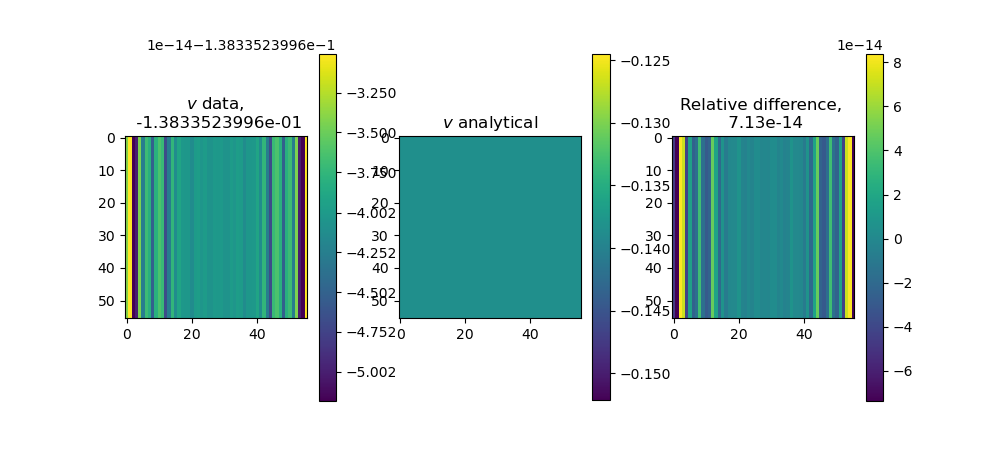

Text(0.5, 1.0, 'Relative difference, \n 7.13e-14')

In [39]:
v = FD.D3z(Gudd[0,0,2])
vth = -Box_ones*s*s*(t**(2*(p1-p2)))/(8*gamma*gamma) #1e-14

v = FD.D3z(Gudd[0,1,2])
vth = -s*s*s*(t**(2*(p1-p2)))*z/(8*gamma*gamma*gamma) #1e-13

v = FD.D3z(Gudd[1,1,2])
vth = Box_ones*s*s*(t**(2*(p1-p2)))/(8*gamma*gamma) #1e-13

v = FD.D3z(Gudd[2,1,1])
vth = -Box_ones*s*s*(t**(2*(p1-p2)))/(4*gamma*gamma) #1e-14

i = 7
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(v[i,4:-4,4:-4])
plt.colorbar()
plt.title(r'$v$ data, '+'\n {:.10e}'.format(np.mean(v[4:-4,4:-4,i])))
plt.subplot(132)
plt.imshow(vth[i,4:-4,4:-4])
plt.colorbar()
plt.title(r'$v$ analytical')
plt.subplot(133)
plt.imshow(v[i,4:-4,4:-4]/vth[i,4:-4,4:-4]-1)
plt.colorbar()
plt.title('Relative difference, '+'\n {:.2e}'.format(np.mean(v[4:-4,4:-4,i]/vth[4:-4,4:-4,i]-1)))

## Check Ricci

In [8]:
RicciS3th = -s*s*(t**(2*(p1-2*p2)))/(8*gamma*gamma)
ER64 = RicciS3 - RicciS3th

In [21]:
convergence_order_3d(ER32, ER64)

Convergence order:  3.6564187690821965


<IPython.core.display.Javascript object>


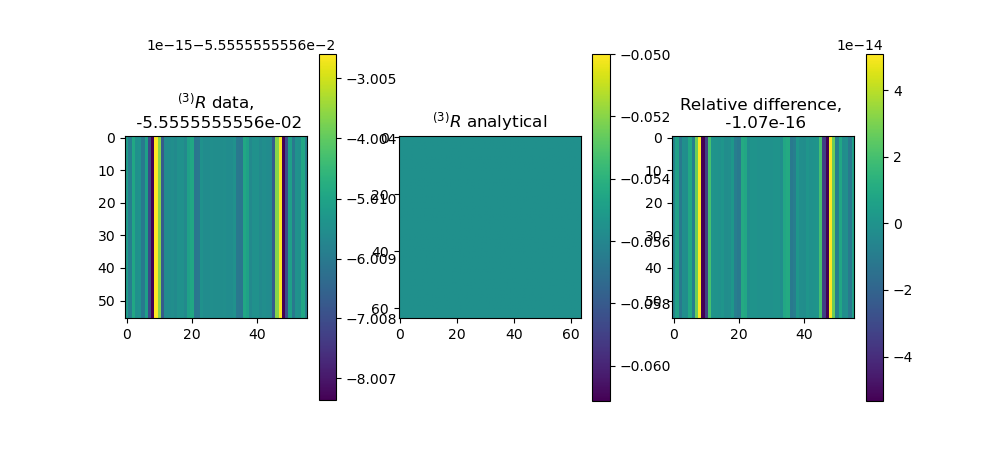

Text(0.5, 1.0, 'Relative difference, \n -1.07e-16')

In [9]:
i = 7
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(RicciS3[4:-4,i,4:-4])
plt.colorbar()
plt.title(r'${}^{(3)}R$ data, '+'\n {:.10e}'.format(np.mean(RicciS3[4:-4,4:-4,i])))
plt.subplot(132)
plt.imshow(RicciS3th*Box_ones[:,i,:])
plt.colorbar()
plt.title(r'${}^{(3)}R$ analytical')
plt.subplot(133)
plt.imshow(RicciS3[4:-4,i,4:-4]/RicciS3th-1)
plt.colorbar()
plt.title('Relative difference, '+'\n {:.2e}'.format(np.mean(RicciS3[4:-4,i,4:-4]/RicciS3th-1)))

## Check $B^2$ and $B^T$

In [10]:
Bdown, B2, Btrace = RCW.Weyl_B(LCdown, gdown, gup, Gudd, Kdown, kappa, Tdown4)
B2th = 3*(p1 - p2)*(p1 - p2)*s*s*abs(gdetth)*(t**(-2 - 8*p2))/(8*gamma*gamma)

EB264 = B2 - B2th
EBT64 = Btrace

In [24]:
convergence_order_3d(EB232, EB264)
convergence_order_3d(EBT32, EBT64)

Convergence order:  0.2762819955667414
Convergence order:  0.29402343580797763


<ipython-input-2-d34230f664c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  c = abs(E1)/abs(E2)


<IPython.core.display.Javascript object>


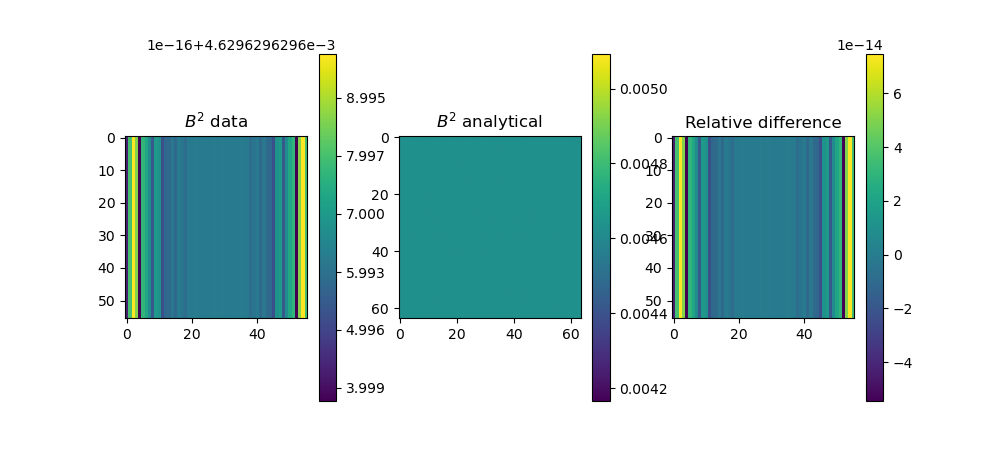

<IPython.core.display.Javascript object>


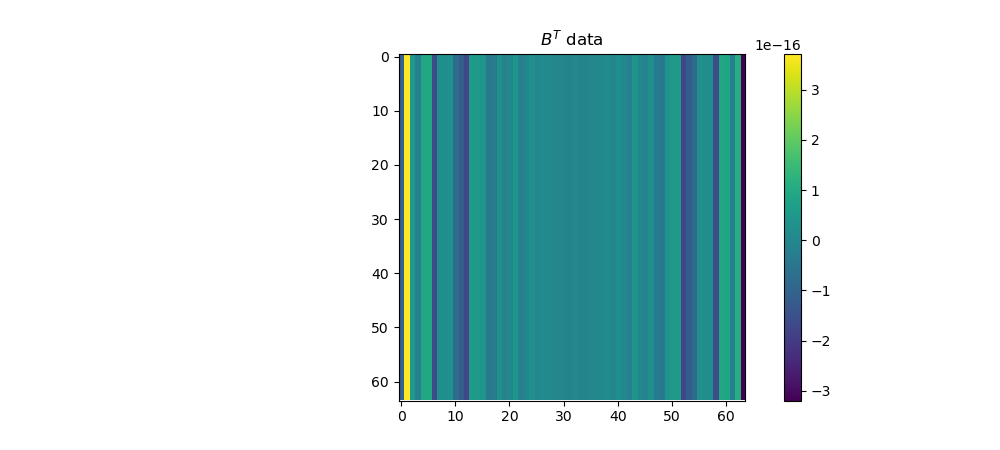

Text(0.5, 1.0, '$B^T$ data')

In [11]:
i = 7
cut = 4
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(B2[cut:-cut,i,cut:-cut])
plt.colorbar()
plt.title(r'$B^2$ data')
plt.subplot(132)
plt.imshow(B2th[:,i,:])
plt.colorbar()
plt.title(r'$B^2$ analytical')
plt.subplot(133)
diff = B2/B2th-1
plt.imshow([[val if val!=-1 else np.median(diff[cut:-cut,i,cut:-cut]) for val in diff[j,i,cut:-cut]] for j in range(cut,N-cut)])
plt.colorbar()
plt.title('Relative difference')

plt.figure(figsize=(10,4.5))
plt.imshow(Btrace[:,i,:])
plt.colorbar()
plt.title(r'$B^T$ data')

## Check $E^2$ and $E^T$

In [12]:
Edown, Eup, E2, Etrace = RCW.Weyl_E(gdown, gup, RicciS3, RicciTdown, Kdown, kappa, rho, 0.0, Tdown4[1:,1:])
parenthesis = (s**2)*(t**(2+2*p1)) - 4*gamma*gamma*(-1 + p1)*(p1 - p2)*(t**(4*p2))
E2th = Box_ones*(t**(-4-8*p2))*(parenthesis**2)/(96*(gamma**4))

EE264 = E2 - E2th
EET64 = Etrace

In [16]:
convergence_order_3d(EE232, EE264)
convergence_order_3d(EET32, EET64)

Convergence order:  3.8637666550814718
Convergence order:  0.6147520717746481


<IPython.core.display.Javascript object>


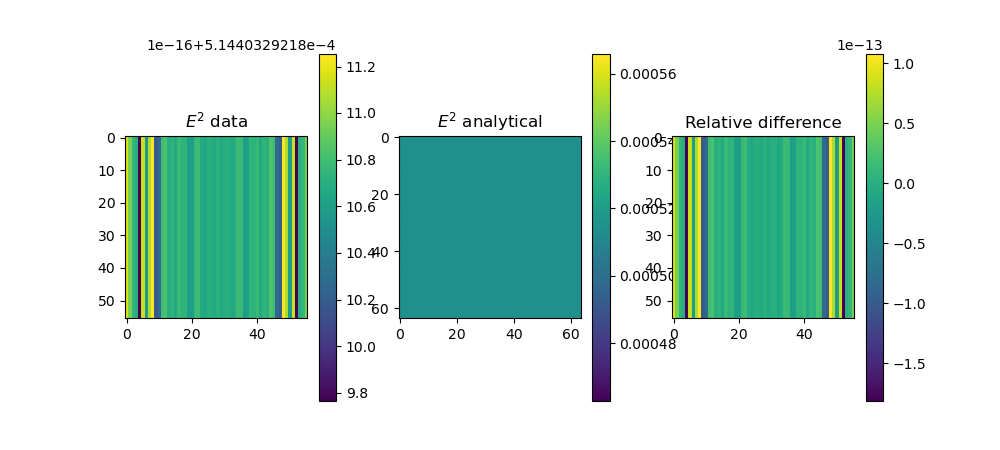

<IPython.core.display.Javascript object>


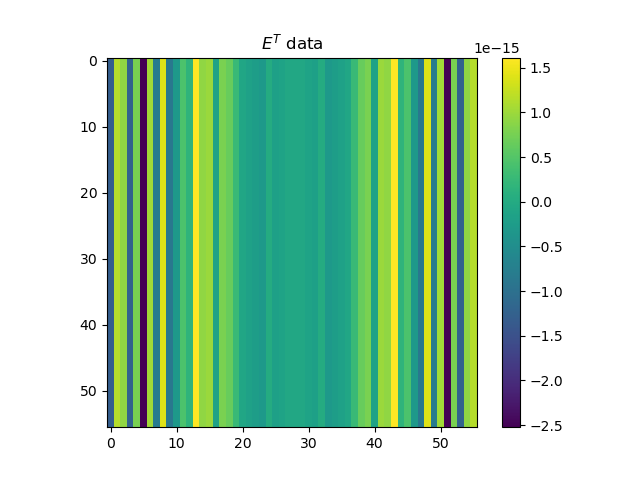

Text(0.5, 1.0, '$E^T$ data')

In [13]:
i = 7
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(E2[4:-4,i,4:-4])
plt.colorbar()
plt.title(r'$E^2$ data')
plt.subplot(132)
plt.imshow(E2th[:,i,:])
plt.colorbar()
plt.title(r'$E^2$ analytical')
plt.subplot(133)
plt.imshow(E2[4:-4,i,4:-4]/E2th[4:-4,i,4:-4]-1)
plt.colorbar()
plt.title('Relative difference')

plt.figure()
plt.imshow(Etrace[4:-4,i,4:-4])
plt.colorbar()
plt.title(r'$E^T$ data')

# Geometrical

In [5]:
dt = dx*0.05
tIN = 1.5-8*dt
tF = 1.5+8*dt

In [6]:
for it, t in enumerate(np.arange(tIN, tF, dt)):
    gdown = np.array([[(t**(2*p1))*Box_ones,      (t**(2*p1))*s*z/(2*gamma),                    Box_zero],
                      [(t**(2*p1))*s*z/(2*gamma), (t**(2*p2))+(t**(2*p1))*((s*z/(2*gamma))**2), Box_zero],
                      [Box_zero,                  Box_zero,                                     (t**(2*p2))*Box_ones]])

    Kdown = (-1/2)*np.array([[2*p1*(t**(2*p1-1))*Box_ones,      2*p1*(t**(2*p1-1))*s*z/(2*gamma),                           Box_zero],
                             [2*p1*(t**(2*p1-1))*s*z/(2*gamma), 2*p2*(t**(2*p2-1))+2*p1*(t**(2*p1-1))*((s*z/(2*gamma))**2), Box_zero],
                             [Box_zero,                         Box_zero,                                                   2*p2*(t**(2*p2-1))*Box_ones]])
    fname = '/home/robynm/simulations/'+simname+'_N'+str(N)+'/all_iterations/'+simname+'_it_{:06d}.hdf5'.format(it)
    with h5py.File(fname, 'w') as fnew:
        fnew['gxx it={}'.format(it)] = gdown[0,0]
        fnew['gxy it={}'.format(it)] = gdown[0,1]
        fnew['gxz it={}'.format(it)] = gdown[0,2]
        fnew['gyy it={}'.format(it)] = gdown[1,1]
        fnew['gyz it={}'.format(it)] = gdown[1,2]
        fnew['gzz it={}'.format(it)] = gdown[2,2]
        fnew['kxx it={}'.format(it)] = Kdown[0,0]
        fnew['kxy it={}'.format(it)] = Kdown[0,1]
        fnew['kxz it={}'.format(it)] = Kdown[0,2]
        fnew['kyy it={}'.format(it)] = Kdown[1,1]
        fnew['kyz it={}'.format(it)] = Kdown[1,2]
        fnew['kzz it={}'.format(it)] = Kdown[2,2]

In [7]:
t = 1.5
it = np.argmin(abs(np.arange(tIN, tF, dt)-t))
fname = '/home/robynm/simulations/'+simname+'_N'+str(N)+'/EBWeyl/it={:06d}.hdf5'.format(it)
f = h5py.File(fname, 'r')
f.keys()

<KeysViewHDF5 ['B2', 'Btrace', 'E2', 'Etrace', 'RicciS4', 'dtdtgdown4', 'dtdxgdown4', 'dtdygdown4', 'dtdzgdown4', 'dtgdown4', 'dxgdown4', 'dygdown4', 'dzgdown4']>

## Check Ricci

In [8]:
RicciS4 = np.array(f['RicciS4'])
t1 = 2*(p1*p1 + p1*(-1 + 2*p2) + p2*(-2 + 3*p2))/(t*t)
t2 = s*s*(t**(2*(p1-2*p2)))/(8*gamma*gamma)
RicciS4th = Box_ones*(t1 - t2)
ER64 = RicciS4 - RicciS4th

In [20]:
convergence_order_3d(ER32, ER64)

Convergence order:  5.687539555633659


<IPython.core.display.Javascript object>


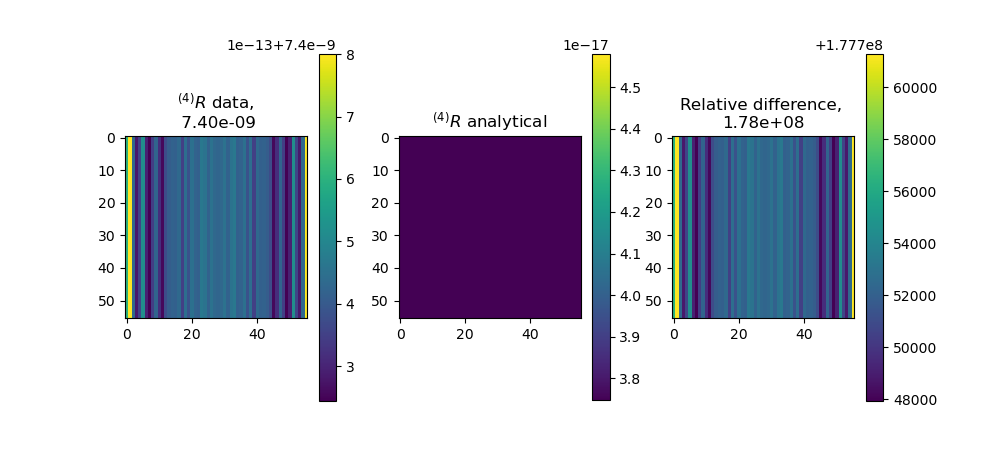

Text(0.5, 1.0, 'Relative difference, \n1.78e+08')

In [9]:
i = 7
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(RicciS4[4:-4,i,4:-4])
plt.colorbar()
plt.title(r'${}^{(4)}R$ data, '+'\n {:.2e}'.format(np.mean(RicciS4[4:-4,i,4:-4])))
plt.subplot(132)
plt.imshow(RicciS4th[4:-4,i,4:-4])
plt.colorbar()
plt.title(r'${}^{(4)}R$ analytical')
plt.subplot(133)
plt.imshow(RicciS4[4:-4,i,4:-4]/RicciS4th[4:-4,i,4:-4]-1)
plt.colorbar()
plt.title('Relative difference, \n'+'{:.2e}'.format(np.mean(RicciS4[4:-4,i,4:-4]/RicciS4th[4:-4,i,4:-4]-1)))

## Check $B^2$ and $B^T$

In [10]:
B2 = np.array(f['B2'])
gdetth = (t**(2*p1 + 4*p2))*Box_ones
B2th = B2th = 3*(p1 - p2)*(p1 - p2)*s*s*abs(gdetth)*(t**(-2 - 8*p2))/(8*gamma*gamma)
Btrace = np.array(f['Btrace'])
EB232 = B2 - B2th
EBT32 = Btrace

In [33]:
convergence_order_3d(EB232, EB264)
convergence_order_3d(EBT32, EBT64)

Convergence order:  -0.460243495929343
Convergence order:  0.1688580208285737


<ipython-input-2-d34230f664c5>:3: RuntimeWarning: invalid value encountered in true_divide
  c = abs(E1)/abs(E2)


<IPython.core.display.Javascript object>


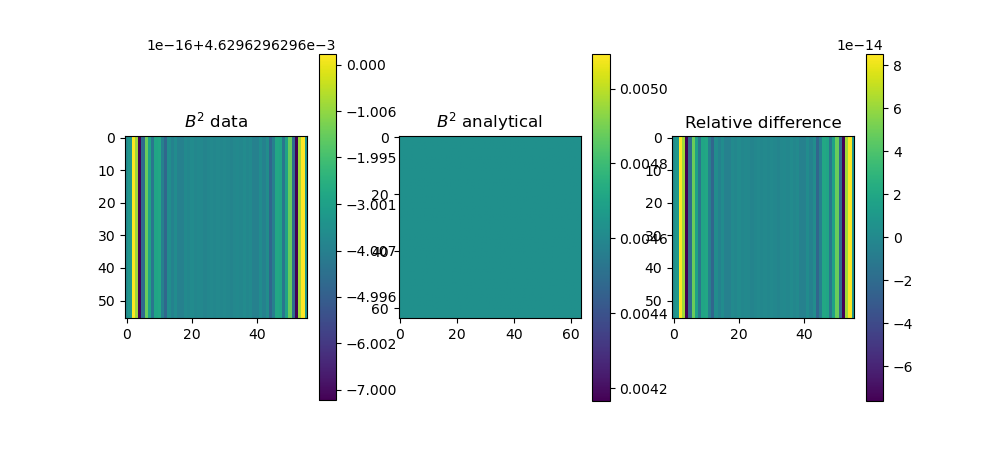

<IPython.core.display.Javascript object>


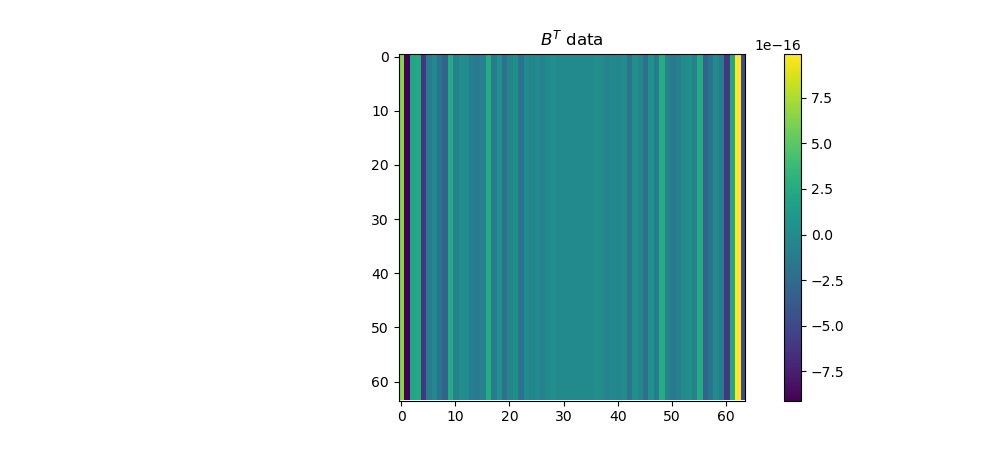

Text(0.5, 1.0, '$B^T$ data')

In [11]:
i = 7
cut = 4
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(B2[cut:-cut,i,cut:-cut])
plt.colorbar()
plt.title(r'$B^2$ data')
plt.subplot(132)
plt.imshow(B2th[:,i,:])
plt.colorbar()
plt.title(r'$B^2$ analytical')
plt.subplot(133)
diff = B2/B2th-1
plt.imshow([[val if val!=-1 else np.median(diff[cut:-cut,i,cut:-cut]) for val in diff[j,i,cut:-cut]] for j in range(cut,N-cut)])
plt.colorbar()
plt.title('Relative difference')

plt.figure(figsize=(10,4.5))
plt.imshow(Btrace[:,i,:])
plt.colorbar()
plt.title(r'$B^T$ data')

## Check $E^2$ and $E^T$

In [12]:
E2 = np.array(f['E2'])
parenthesis = (s**2)*(t**(2+2*p1)) - 4*gamma*gamma*(-1 + p1)*(p1 - p2)*(t**(4*p2))
E2th = Box_ones*(t**(-4-8*p2))*(parenthesis**2)/(96*(gamma**4))
Etrace = np.array(f['Etrace'])

EE264 = E2 - E2th
EET64 = Etrace

In [26]:
convergence_order_3d(EE232, EE264)
convergence_order_3d(EET32, EET64)

Convergence order:  5.7663343709626895
Convergence order:  0.6250854090034245


<ipython-input-2-d34230f664c5>:3: RuntimeWarning: divide by zero encountered in true_divide
  c = abs(E1)/abs(E2)


<IPython.core.display.Javascript object>


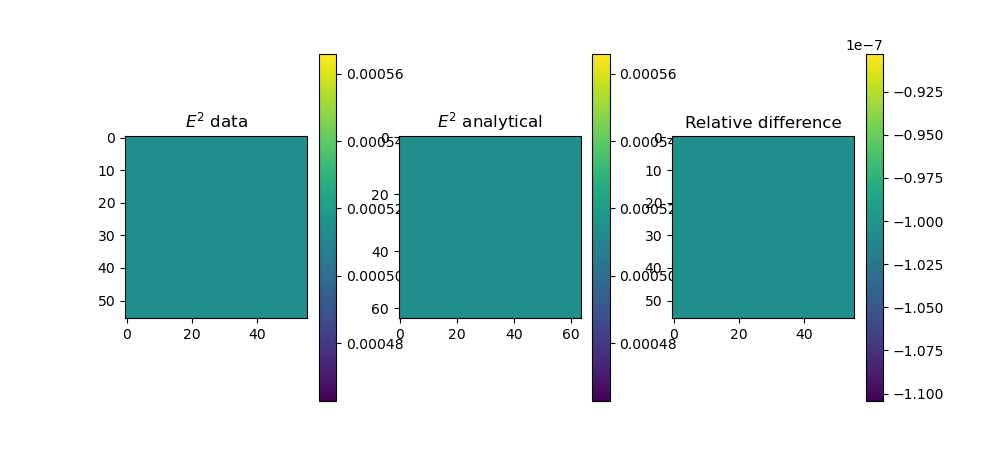

<IPython.core.display.Javascript object>


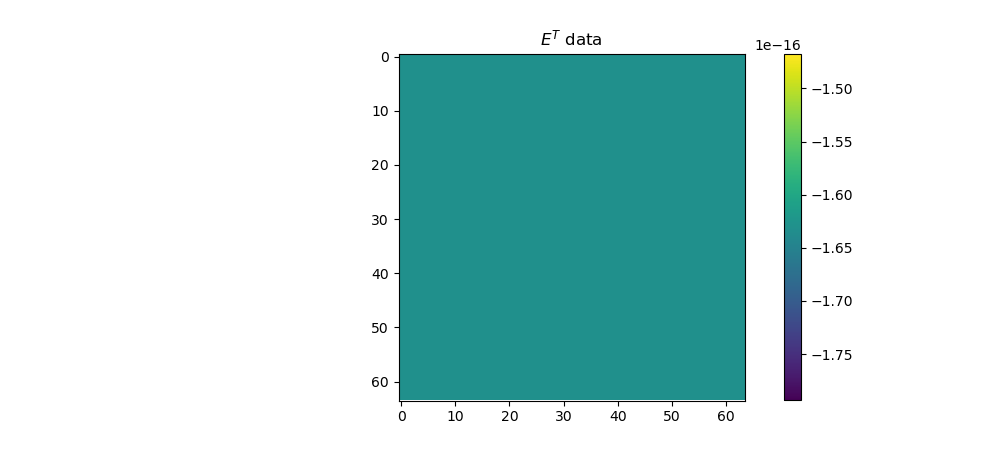

Text(0.5, 1.0, '$E^T$ data')

In [13]:
i = 7
cut = 4
plt.figure(figsize=(10,4.5))
plt.subplot(131)
plt.imshow(E2[cut:-cut,cut:-cut,i])
plt.colorbar()
plt.title(r'$E^2$ data')
plt.subplot(132)
plt.imshow(E2th[:,:,i])
plt.colorbar()
plt.title(r'$E^2$ analytical')
plt.subplot(133)
plt.imshow(E2[cut:-cut,cut:-cut,i]/E2th[cut:-cut,cut:-cut,i]-1)
plt.colorbar()
plt.title('Relative difference')

plt.figure(figsize=(10,4.5))
plt.imshow(Etrace[:,:,i])
plt.colorbar()
plt.title(r'$E^T$ data')

# Invariants

In [5]:
t = 1.5
gdown = np.array([[(t**(2*p1))*Box_ones,      (t**(2*p1))*s*z/(2*gamma),                    Box_zero],
                  [(t**(2*p1))*s*z/(2*gamma), (t**(2*p2))+(t**(2*p1))*((s*z/(2*gamma))**2), Box_zero],
                  [Box_zero,                  Box_zero,                                     (t**(2*p2))*Box_ones]])

Kdown = (-1/2)*np.array([[2*p1*(t**(2*p1-1))*Box_ones,      2*p1*(t**(2*p1-1))*s*z/(2*gamma),                           Box_zero],
                         [2*p1*(t**(2*p1-1))*s*z/(2*gamma), 2*p2*(t**(2*p2-1))+2*p1*(t**(2*p1-1))*((s*z/(2*gamma))**2), Box_zero],
                         [Box_zero,                         Box_zero,                                                   2*p2*(t**(2*p2-1))*Box_ones]])
glist = [gdown[0,0], gdown[0,1], gdown[0,2], gdown[1,1], gdown[1,2], gdown[2,2]]
gdet = RRead.det3(glist)
gup = RRead.inv3(glist)
gmixed = np.einsum('ij...,jk...->ik...', gup, gdown)


RCW = RCW_file.Ricci_CoGrad_Weyl_Class(FD)
Gudd = RCW.Christoffel_symbol(gdown, gup)
RicciTdown, RicciS3 = RCW.Ricci_TandS(gup, Gudd)
G        = 1
kappa    = 8*np.pi*G
rho      = (6-gamma)/(kappa*4*t*t*gamma*gamma)
pressure = (gamma-1)*rho
uup = np.array([Box_ones, Box_zero, Box_zero, Box_zero])
gdown4 = np.array([[-Box_ones, Box_zero,   Box_zero,   Box_zero],
                   [Box_zero,  gdown[0,0], gdown[0,1], gdown[0,2]],
                   [Box_zero,  gdown[1,0], gdown[1,1], gdown[1,2]],
                   [Box_zero,  gdown[2,0], gdown[2,1], gdown[2,2]]])
udown = np.einsum('ab...,b...->a...', gdown4, uup)
Tdown4 = (rho+pressure)*np.einsum('a...,b...->ab...',udown,udown)+pressure*gdown4
LCdown = np.zeros([3,3,3, N, N, N])
LCdown[0, 1, 2, :, :, :] = np.sqrt(abs(gdet))
LCdown[1, 2, 0, :, :, :] = np.sqrt(abs(gdet))
LCdown[2, 0, 1, :, :, :] = np.sqrt(abs(gdet))
LCdown[2, 1, 0, :, :, :] = -np.sqrt(abs(gdet))
LCdown[0, 2, 1, :, :, :] = -np.sqrt(abs(gdet))
LCdown[1, 0, 2, :, :, :] = -np.sqrt(abs(gdet))
LCuud3 = np.einsum('ae...,bf...,efc...->abc...', gup, gup, LCdown)

Bdict = RCW.Weyl_B(gdown, gup, uup, LCuud3, Gudd, Kdown)
Edict = RCW.Weyl_E(gdown, gup, LCuud3, Gudd, RicciS3, RicciTdown, Kdown, kappa, Tdown4[1:,1:])
invar_dict = RCW.Weyl_Invar(gdown, Edict, Bdict)

In [6]:
icut = 6

In [7]:
print('psi0 = ', np.average(abs(invar_dict['psi0'][icut:-icut, icut:-icut, icut:-icut])))
print('psi1 = ', np.average(abs(invar_dict['psi1'][icut:-icut, icut:-icut, icut:-icut])))
print('psi2 = ', np.average(abs(invar_dict['psi2'][icut:-icut, icut:-icut, icut:-icut])))
print('psi3 = ', np.average(abs(invar_dict['psi3'][icut:-icut, icut:-icut, icut:-icut])))
print('psi4 = ', np.average(abs(invar_dict['psi4'][icut:-icut, icut:-icut, icut:-icut])))

psi0 =  1.5867161454130551e-16
psi1 =  1.0673182376440158e-16
psi2 =  0.03674654598700819
psi3 =  1.0780534121358234e-16
psi4 =  1.657560913752083e-16


In [8]:
print('S-1 = ', np.average(abs(invar_dict['S'][4:-4, 4:-4, 4:-4])-1))

I = np.array(invar_dict['I'])
J = np.array(invar_dict['J'])
Scrit = I*I*I-27*J*J
print('Scrit = ', np.average(abs(Scrit[icut:-icut, icut:-icut, icut:-icut])))
print('I = ', np.average(abs(invar_dict['I'][icut:-icut, icut:-icut, icut:-icut])))
print('J = ', np.average(abs(invar_dict['J'][icut:-icut, icut:-icut, icut:-icut])))
print('K = ', np.average(abs(invar_dict['K'][icut:-icut, icut:-icut, icut:-icut])))
print('N = ', np.average(abs(invar_dict['N'][icut:-icut, icut:-icut, icut:-icut])))
print('LS = ', np.average(abs(invar_dict['LS'][icut:-icut, icut:-icut, icut:-icut])))

S-1 =  8.66398002723972e-16
Scrit =  8.015915090242911e-22
I =  0.004050925925925925
J =  4.961917860900018e-05
K =  4.409675661284222e-32
N =  1.0279900680194434e-33
LS =  6.0909638343458074e-18


<IPython.core.display.Javascript object>


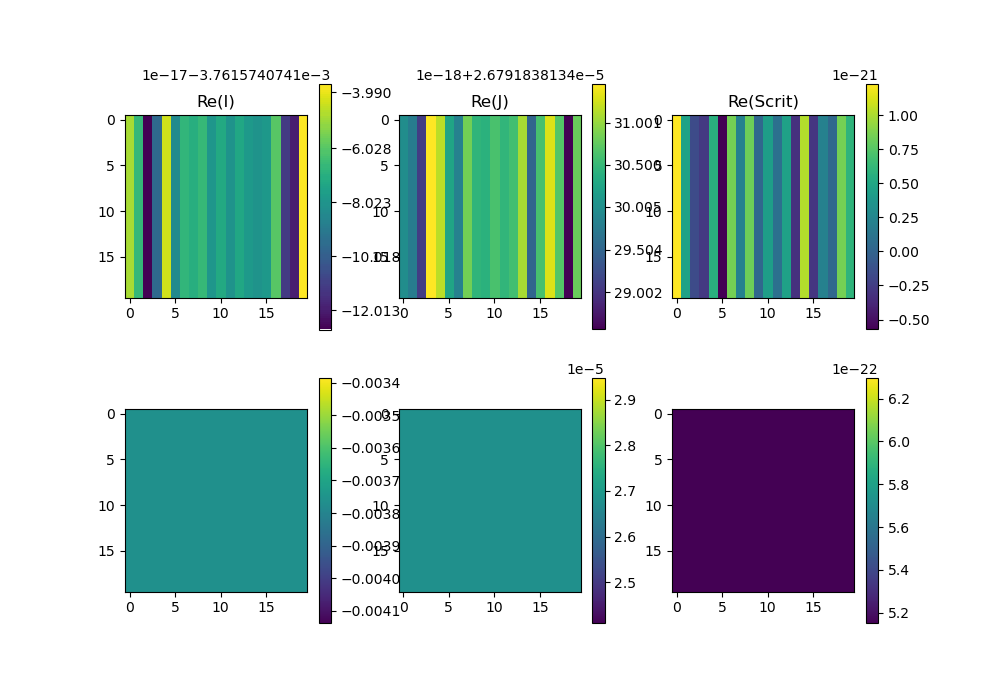

<IPython.core.display.Javascript object>


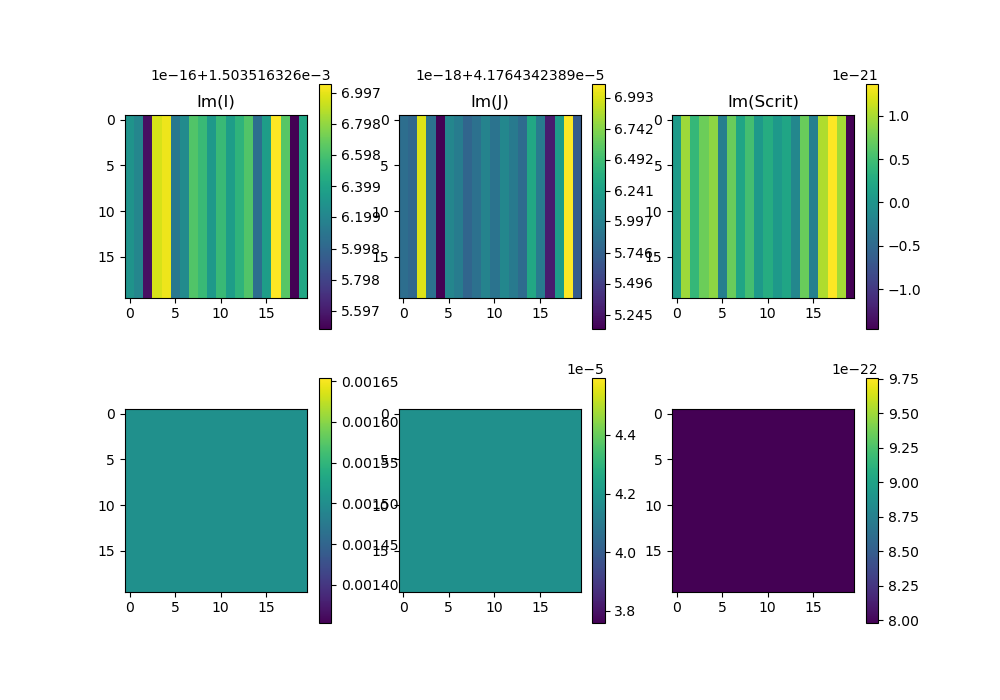

In [9]:
i = 10
plt.figure(figsize=(10,7))
plt.subplot(231)
plt.imshow(np.real(invar_dict['I'][icut:-icut,i,icut:-icut]))
plt.title('Re(I)')
plt.colorbar()
plt.subplot(234)
plt.imshow(np.real(invar_dict['I'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(232)
plt.imshow(np.real(invar_dict['J'][icut:-icut,i,icut:-icut]))
plt.title('Re(J)')
plt.colorbar()
plt.subplot(235)
plt.imshow(np.real(invar_dict['J'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(233)
plt.imshow(np.real(Scrit[icut:-icut,i,icut:-icut]))
plt.title('Re(Scrit)')
plt.colorbar()
plt.subplot(236)
plt.imshow(np.real(Scrit[icut:-icut,icut:-icut,i]))
plt.colorbar()


plt.figure(figsize=(10,7))
plt.subplot(231)
plt.imshow(np.imag(invar_dict['I'][icut:-icut,i,icut:-icut]))
plt.title('Im(I)')
plt.colorbar()
plt.subplot(234)
plt.imshow(np.imag(invar_dict['I'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(232)
plt.imshow(np.imag(invar_dict['J'][icut:-icut,i,icut:-icut]))
plt.title('Im(J)')
plt.colorbar()
plt.subplot(235)
plt.imshow(np.imag(invar_dict['J'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(233)
plt.imshow(np.imag(Scrit[icut:-icut,i,icut:-icut]))
plt.title('Im(Scrit)')
plt.colorbar()
plt.subplot(236)
plt.imshow(np.imag(Scrit[icut:-icut,icut:-icut,i]))
plt.colorbar()

<IPython.core.display.Javascript object>


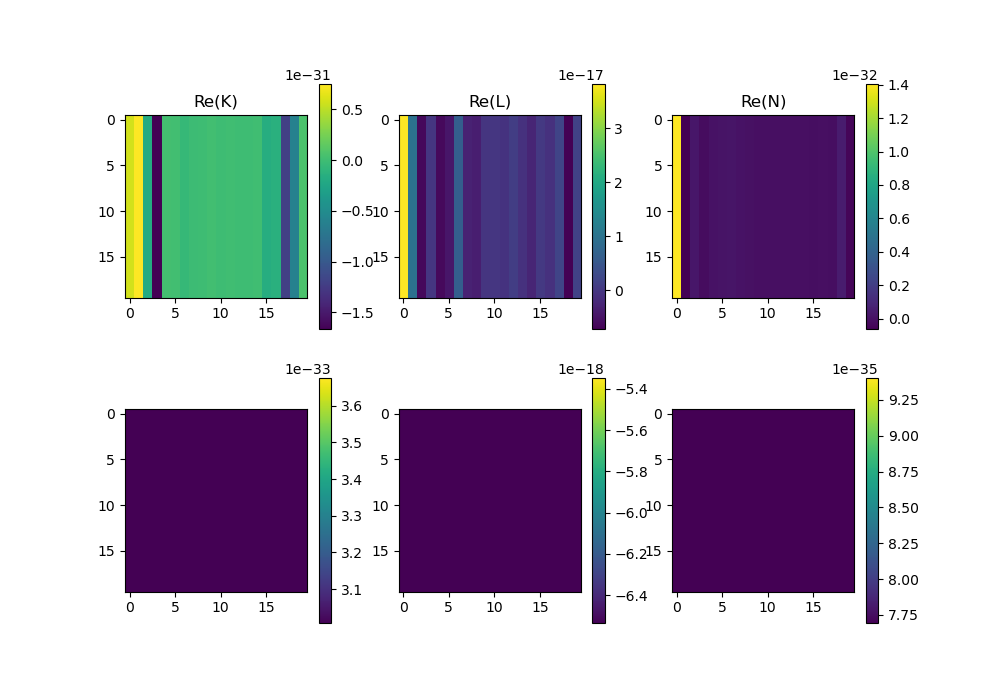

<IPython.core.display.Javascript object>


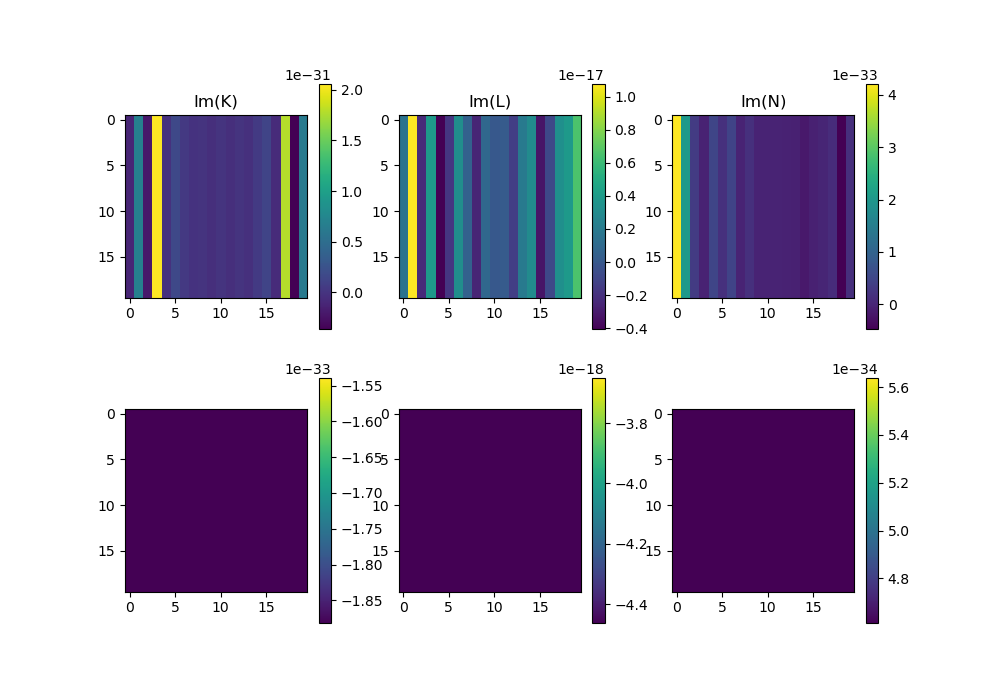

In [10]:
i = 10
plt.figure(figsize=(10,7))
plt.subplot(231)
plt.imshow(np.real(invar_dict['K'][icut:-icut,i,icut:-icut]))
plt.title('Re(K)')
plt.colorbar()
plt.subplot(234)
plt.imshow(np.real(invar_dict['K'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(232)
plt.imshow(np.real(invar_dict['LS'][icut:-icut,i,icut:-icut]))
plt.title('Re(L)')
plt.colorbar()
plt.subplot(235)
plt.imshow(np.real(invar_dict['LS'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(233)
plt.imshow(np.real(invar_dict['N'][icut:-icut,i,icut:-icut]))
plt.title('Re(N)')
plt.colorbar()
plt.subplot(236)
plt.imshow(np.real(invar_dict['N'][icut:-icut,icut:-icut,i]))
plt.colorbar()


plt.figure(figsize=(10,7))
plt.subplot(231)
plt.imshow(np.imag(invar_dict['K'][icut:-icut,i,icut:-icut]))
plt.title('Im(K)')
plt.colorbar()
plt.subplot(234)
plt.imshow(np.imag(invar_dict['K'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(232)
plt.imshow(np.imag(invar_dict['LS'][icut:-icut,i,icut:-icut]))
plt.title('Im(L)')
plt.colorbar()
plt.subplot(235)
plt.imshow(np.imag(invar_dict['LS'][icut:-icut,icut:-icut,i]))
plt.colorbar()

plt.subplot(233)
plt.imshow(np.imag(invar_dict['N'][icut:-icut,i,icut:-icut]))
plt.title('Im(N)')
plt.colorbar()
plt.subplot(236)
plt.imshow(np.imag(invar_dict['N'][icut:-icut,icut:-icut,i]))
plt.colorbar()

# Type D